# Cyclone Preheater:
Project 1

 Problem Statement:
  You are provided a dataset of a cyclone preheater which is part of an industrial process. In the duration of operation there   are instances of abnormal operations.
  
 Objective:
  Using python and any algorithm of your choice, highlight time periods where this abnormality can be observed

 
 There are 6 variables and 370k records. Data is recorded once every 5 minutes over a duration of 3 years.
1.	Cyclone_Inlet_Gas_Temp – Temperature of Hot gas entering the cyclone.
2.	Cyclone_Gas_Outlet_Temp – Temperature of Hot gas leaving the cyclone.
3.	Cyclone_Outlet_Gas_draft – Draft (pressure) of gas at outlet of cyclone.
4.	Cyclone_cone_draft – Draft (pressure) of gas at cone section of cyclone.
5.	Cyclone_Inlet_Draft – Draft (pressure) of gas at inlet of cyclone.
6.	Cyclone_Material_Temp – Temperature of the material at the outlet of the cyclone.



In [1]:
#Importing All Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_excel("cyclone preheater.xlsx")
# pd.set_option('display.max_rows',None)
df_train.head()

time Cyclone_Inlet_Gas_Temp Cyclone_Material_Temp  \
0 2017-01-01 00:00:00                 867.63                910.42   
1 2017-01-01 00:05:00                 879.23                918.14   
2 2017-01-01 00:10:00                 875.67                924.18   
3 2017-01-01 00:15:00                 875.28                923.15   
4 2017-01-01 00:20:00                 891.66                934.26   

  Cyclone_Outlet_Gas_draft Cyclone_cone_draft Cyclone_Gas_Outlet_Temp  \
0                  -189.54            -186.04                  852.13   
1                  -184.33             -182.1                  862.53   
2                  -181.26            -166.47                  866.06   
3                  -179.15            -174.83                  865.85   
4                  -178.32            -173.72                  876.06   

  Cyclone_Inlet_Draft  
0              -145.9  
1             -149.76  
2             -145.01  
3             -142.82  
4             -143.39

In [3]:
print("No: of Rows and columns for data set  : ",df_train.shape)

No: of Rows and columns for data set  :  (377719, 7)


In [4]:
df_train.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp              object
Cyclone_Material_Temp               object
Cyclone_Outlet_Gas_draft            object
Cyclone_cone_draft                  object
Cyclone_Gas_Outlet_Temp             object
Cyclone_Inlet_Draft                 object
dtype: object

In [5]:
df_train.isnull().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

<AxesSubplot:>

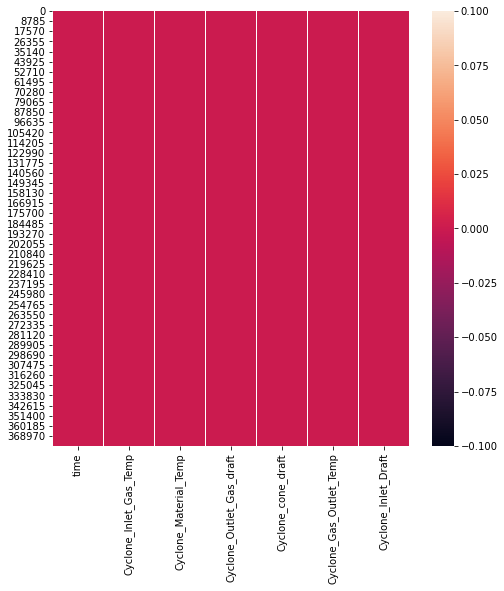

In [6]:
plt.figure(figsize=[8,8])
sns.heatmap(df_train.isnull())

In [7]:
df_train.Cyclone_Inlet_Gas_Temp.value_counts()
#pd.set_option('display.max_rows',None)

Not Connect    723
I/O Timeout    470
23.53          309
900.12         161
879.55         159
              ... 
339.11           1
74.63            1
499.15           1
637.75           1
760.77           1
Name: Cyclone_Inlet_Gas_Temp, Length: 39736, dtype: int64

In [8]:
df_train.drop(df_train[df_train['Cyclone_Inlet_Gas_Temp']=='Configure'].index, inplace = True)
df_train.drop(df_train[df_train['Cyclone_Inlet_Gas_Temp']=='Scan Timeout'].index, inplace = True)
df_train.drop(df_train[df_train['Cyclone_Inlet_Gas_Temp']=='Comm Fail'].index, inplace = True)
df_train.drop(df_train[df_train['Cyclone_Inlet_Gas_Temp']=='I/O Timeout'].index, inplace = True)
df_train.drop(df_train[df_train['Cyclone_Inlet_Gas_Temp']=='Not Connect'].index, inplace = True)

In [9]:
#This step is for converting all the string values to numeric in numeric columns, so than we can do numeric functions on it
df_train = df_train.apply(pd.to_numeric, errors='coerce')

In [10]:
df_train['Cyclone_Material_Temp'].mean()

750.8304832130968

In [11]:
df_train['Cyclone_Material_Temp'].median()

913.36

-1.4841752550142278


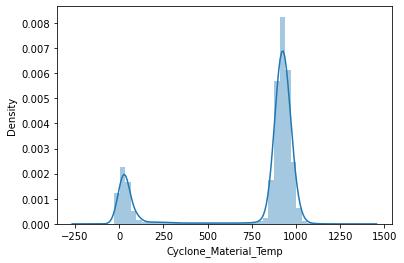

In [12]:
sns.distplot(df_train['Cyclone_Material_Temp'])
print(df_train['Cyclone_Material_Temp'].skew())

In [13]:
#Lets add median for nan values as there is skewness.If it was normal distribution we can use mean to replace.
df_train['Cyclone_Material_Temp'] = df_train['Cyclone_Material_Temp'].fillna((df_train['Cyclone_Material_Temp'].median()))
df_train['Cyclone_Outlet_Gas_draft'] = df_train['Cyclone_Outlet_Gas_draft'].fillna((df_train['Cyclone_Outlet_Gas_draft'].median()))
df_train['Cyclone_Gas_Outlet_Temp'] = df_train['Cyclone_Gas_Outlet_Temp'].fillna((df_train['Cyclone_Gas_Outlet_Temp'].median()))
df_train['Cyclone_Inlet_Draft'] = df_train['Cyclone_Inlet_Draft'].fillna((df_train['Cyclone_Inlet_Draft'].median()))
df_train['Cyclone_Inlet_Draft'] = df_train['Cyclone_Inlet_Draft'].fillna((df_train['Cyclone_Inlet_Draft'].median()))



In [14]:
df_train.isnull().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

In [15]:
print("No: of Rows and columns for data set  : ",df_train.shape)

No: of Rows and columns for data set  :  (376399, 7)


In [16]:
df_train.head()

time  Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
0  1483228800000000000                  867.63                 910.42   
1  1483229100000000000                  879.23                 918.14   
2  1483229400000000000                  875.67                 924.18   
3  1483229700000000000                  875.28                 923.15   
4  1483230000000000000                  891.66                 934.26   

   Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  \
0                   -189.54             -186.04                   852.13   
1                   -184.33             -182.10                   862.53   
2                   -181.26             -166.47                   866.06   
3                   -179.15             -174.83                   865.85   
4                   -178.32             -173.72                   876.06   

   Cyclone_Inlet_Draft  
0              -145.90  
1              -149.76  
2              -145.01  
3              -142.82  
4              -143.39

## Feature Extraction:

In [17]:
df_train["time"]=pd.to_datetime(df_train["time"])

In [18]:
df_train['day']=df_train['time'].dt.day
df_train['month']=df_train['time'].dt.month
df_train['year']=df_train['time'].dt.year
df_train['hours']=df_train['time'].dt.hour
df_train['minutes']=df_train['time'].dt.minute
#df_train['seconds']=df_train['time'].dt.second

In [19]:
df_train.head()

time  Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
0 2017-01-01 00:00:00                  867.63                 910.42   
1 2017-01-01 00:05:00                  879.23                 918.14   
2 2017-01-01 00:10:00                  875.67                 924.18   
3 2017-01-01 00:15:00                  875.28                 923.15   
4 2017-01-01 00:20:00                  891.66                 934.26   

   Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  \
0                   -189.54             -186.04                   852.13   
1                   -184.33             -182.10                   862.53   
2                   -181.26             -166.47                   866.06   
3                   -179.15             -174.83                   865.85   
4                   -178.32             -173.72                   876.06   

   Cyclone_Inlet_Draft  day  month  year  hours  minutes  
0              -145.90    1      1  2017      0        0  
1              -149.76    1      1  2017      0        5  
2              -145.01    1      1  2017      0       10  
3              -142.82    1      1  2017      0       15  
4              -143.39    1      1  2017      0       20

In [20]:
df_train.isnull().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
day                         0
month                       0
year                        0
hours                       0
minutes                     0
dtype: int64

In [21]:
df_train.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp            float64
Cyclone_Inlet_Draft                float64
day                                  int64
month                                int64
year                                 int64
hours                                int64
minutes                              int64
dtype: object

In [22]:
df_train.describe()

Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
count           376399.000000          376399.000000   
mean               727.348549             750.947501   
std                328.664814             350.821805   
min                  0.000000            -185.000000   
25%                856.270000             867.730000   
50%                882.380000             913.360000   
75%                901.110000             943.630000   
max               1157.630000            1375.000000   

       Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  \
count             376399.000000       376399.000000            376399.000000   
mean                -177.820784         -164.572619               715.760386   
std                   99.147124           90.103023               325.346113   
min                 -456.660000         -459.310000                13.790000   
25%                 -247.190000         -226.770000               801.960000   
50%                 -215.260000         -198.560000               871.525000   
75%                 -170.130000         -143.640000               899.300000   
max                   40.270000          488.860000              1375.000000   

       Cyclone_Inlet_Draft            day          month           year  \
count        376399.000000  376399.000000  376399.000000  376399.000000   
mean           -141.303006      15.645084       6.103677    2018.338141   
std              77.615397       8.792099       3.371647       1.054199   
min            -396.370000       1.000000       1.000000    2017.000000   
25%            -193.510000       8.000000       3.000000    2017.000000   
50%            -169.460000      16.000000       6.000000    2018.000000   
75%            -136.290000      23.000000       9.000000    2019.000000   
max              41.640000      31.000000      12.000000    2020.000000   

               hours        minutes  
count  376399.000000  376399.000000  
mean       11.495599      27.500246  
std         6.925556      17.260425  
min         0.000000       0.000000  
25%         5.000000      15.000000  
50%        11.000000      30.000000  
75%        18.000000      45.000000  
max        23.000000      55.000000

In [23]:
df_train.nunique()

time                        376399
Cyclone_Inlet_Gas_Temp       39731
Cyclone_Material_Temp        39656
Cyclone_Outlet_Gas_draft     27663
Cyclone_cone_draft           26482
Cyclone_Gas_Outlet_Temp      48039
Cyclone_Inlet_Draft          24004
day                             31
month                           12
year                             4
hours                           24
minutes                         12
dtype: int64

In [24]:
#df_train.apply(lambda x: x.value_counts())

# EDA

<AxesSubplot:title={'center':'Analysis of Outlet temp VS Inlet temp'}, xlabel='Cyclone_Gas_Outlet_Temp', ylabel='Cyclone_Inlet_Gas_Temp'>

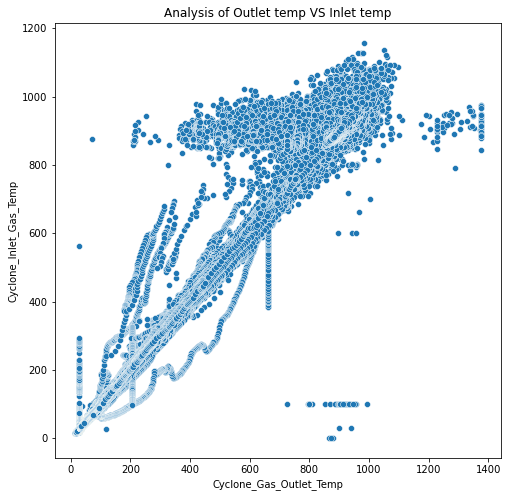

In [25]:
plt.figure(figsize=[8,8])
plt.title('Analysis of Outlet temp VS Inlet temp')
sns.scatterplot(df_train['Cyclone_Gas_Outlet_Temp'],df_train['Cyclone_Inlet_Gas_Temp'],palette='bright')

<AxesSubplot:title={'center':'Analysis of Cyclone_Material_Temp VS Inlet temp'}, xlabel='Cyclone_Material_Temp', ylabel='Cyclone_Inlet_Gas_Temp'>

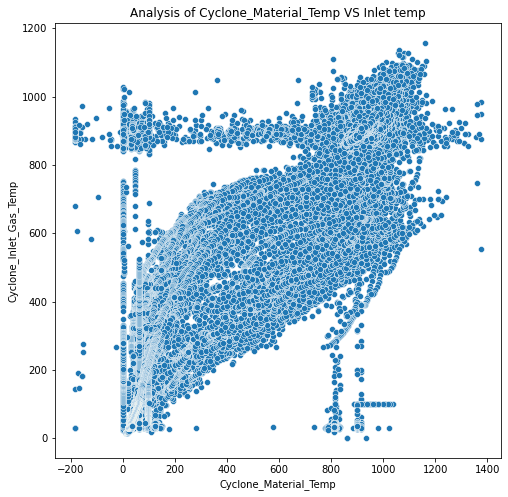

In [26]:
plt.figure(figsize=[8,8])
plt.title('Analysis of Cyclone_Material_Temp VS Inlet temp')
sns.scatterplot(df_train['Cyclone_Material_Temp'],df_train['Cyclone_Inlet_Gas_Temp'],palette='bright')

<AxesSubplot:title={'center':'Analysis of Cyclone_Material_Temp VS Cyclone_Gas_Outlet_Temp'}, xlabel='Cyclone_Material_Temp', ylabel='Cyclone_Gas_Outlet_Temp'>

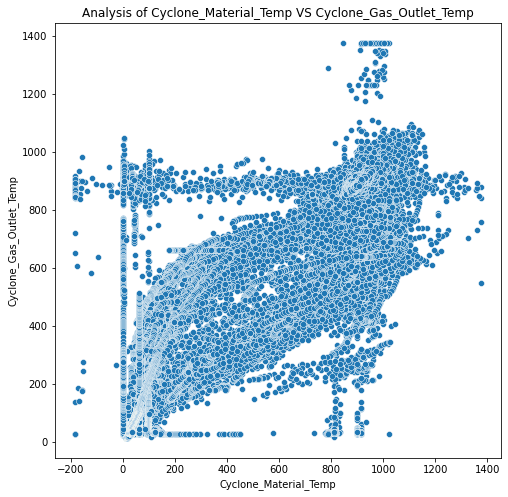

In [27]:
plt.figure(figsize=[8,8])
plt.title('Analysis of Cyclone_Material_Temp VS Cyclone_Gas_Outlet_Temp')
sns.scatterplot(df_train['Cyclone_Material_Temp'],df_train['Cyclone_Gas_Outlet_Temp'],palette='bright')

<AxesSubplot:title={'center':'Analysis of Cyclone_Outlet_Gas_draft VS Cyclone_Inlet_Draft'}, xlabel='Cyclone_Outlet_Gas_draft', ylabel='Cyclone_Inlet_Draft'>

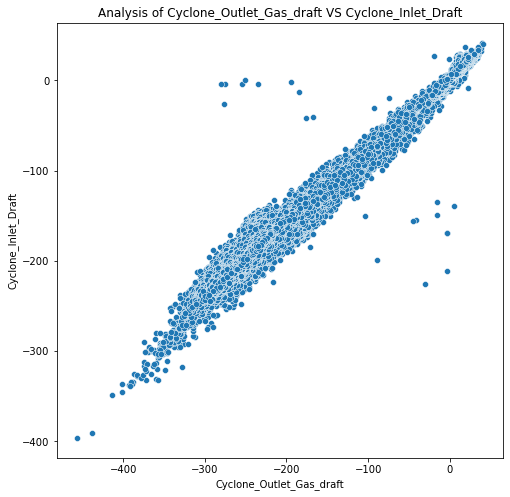

In [28]:
plt.figure(figsize=[8,8])
plt.title('Analysis of Cyclone_Outlet_Gas_draft VS Cyclone_Inlet_Draft')
sns.scatterplot(df_train['Cyclone_Outlet_Gas_draft'],df_train['Cyclone_Inlet_Draft'],palette='bright')

<AxesSubplot:title={'center':'Analysis of Cyclone_cone_draft VS Cyclone_Inlet_Draft'}, xlabel='Cyclone_cone_draft', ylabel='Cyclone_Inlet_Draft'>

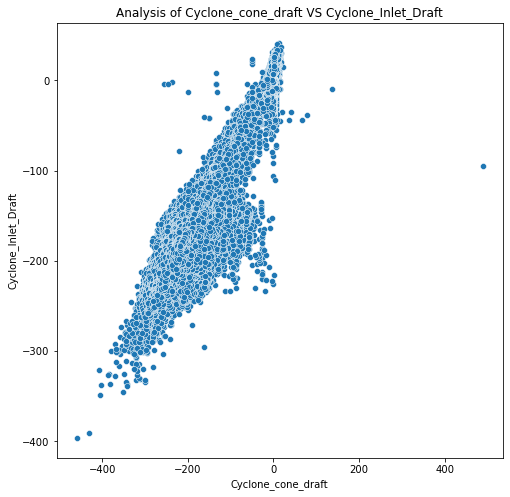

In [29]:
plt.figure(figsize=[8,8])
plt.title('Analysis of Cyclone_cone_draft VS Cyclone_Inlet_Draft')
sns.scatterplot(df_train['Cyclone_cone_draft'],df_train['Cyclone_Inlet_Draft'],palette='bright')

<AxesSubplot:title={'center':'Analysis of Cyclone_cone_draft VS Cyclone_Outlet_Gas_draft'}, xlabel='Cyclone_cone_draft', ylabel='Cyclone_Outlet_Gas_draft'>

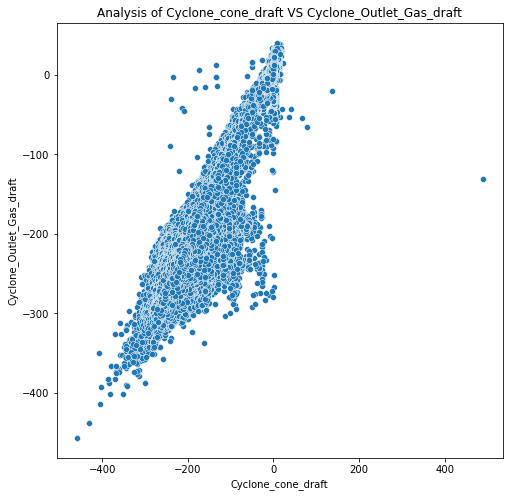

In [30]:
plt.figure(figsize=[8,8])
plt.title('Analysis of Cyclone_cone_draft VS Cyclone_Outlet_Gas_draft')
sns.scatterplot(df_train['Cyclone_cone_draft'],df_train['Cyclone_Outlet_Gas_draft'],palette='bright')

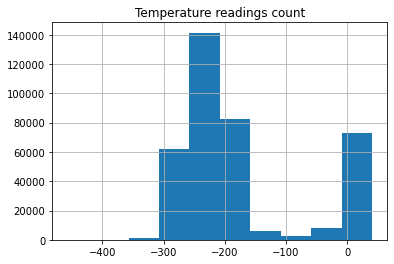

In [31]:
df_train["Cyclone_Outlet_Gas_draft"].hist(grid=True)
plt.title("Temperature readings count")
plt.show()

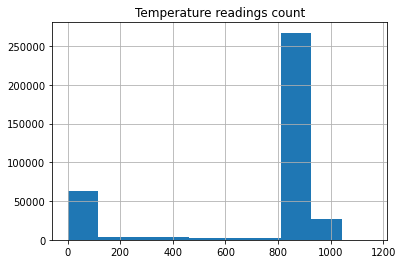

In [32]:
df_train["Cyclone_Inlet_Gas_Temp"].hist(grid=True)
plt.title("Temperature readings count")
plt.show()

# Multivariate Analysis:

In [33]:
corr_mat=df_train.corr()
corr_mat

Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
Cyclone_Inlet_Gas_Temp                  1.000000               0.964154   
Cyclone_Material_Temp                   0.964154               1.000000   
Cyclone_Outlet_Gas_draft               -0.903032              -0.880115   
Cyclone_cone_draft                     -0.899646              -0.877084   
Cyclone_Gas_Outlet_Temp                 0.990970               0.956816   
Cyclone_Inlet_Draft                    -0.901817              -0.878864   
day                                     0.037004               0.037505   
month                                  -0.247490              -0.237428   
year                                   -0.094299              -0.101664   
hours                                  -0.000216              -0.001355   
minutes                                 0.000138              -0.000046   

                          Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  \
Cyclone_Inlet_Gas_Temp                   -0.903032           -0.899646   
Cyclone_Material_Temp                    -0.880115           -0.877084   
Cyclone_Outlet_Gas_draft                  1.000000            0.968425   
Cyclone_cone_draft                        0.968425            1.000000   
Cyclone_Gas_Outlet_Temp                  -0.898729           -0.893098   
Cyclone_Inlet_Draft                       0.995430            0.969442   
day                                      -0.041335           -0.024315   
month                                     0.227787            0.214595   
year                                     -0.068102            0.054120   
hours                                    -0.001200           -0.000239   
minutes                                   0.000571            0.000696   

                          Cyclone_Gas_Outlet_Temp  Cyclone_Inlet_Draft  \
Cyclone_Inlet_Gas_Temp                   0.990970            -0.901817   
Cyclone_Material_Temp                    0.956816            -0.878864   
Cyclone_Outlet_Gas_draft                -0.898729             0.995430   
Cyclone_cone_draft                      -0.893098             0.969442   
Cyclone_Gas_Outlet_Temp                  1.000000            -0.898517   
Cyclone_Inlet_Draft                     -0.898517             1.000000   
day                                      0.035599            -0.035747   
month                                   -0.235381             0.212807   
year                                    -0.081766            -0.046586   
hours                                   -0.001429            -0.001592   
minutes                                  0.000060             0.000606   

                               day     month      year     hours   minutes  
Cyclone_Inlet_Gas_Temp    0.037004 -0.247490 -0.094299 -0.000216  0.000138  
Cyclone_Material_Temp     0.037505 -0.237428 -0.101664 -0.001355 -0.000046  
Cyclone_Outlet_Gas_draft -0.041335  0.227787 -0.068102 -0.001200  0.000571  
Cyclone_cone_draft       -0.024315  0.214595  0.054120 -0.000239  0.000696  
Cyclone_Gas_Outlet_Temp   0.035599 -0.235381 -0.081766 -0.001429  0.000060  
Cyclone_Inlet_Draft      -0.035747  0.212807 -0.046586 -0.001592  0.000606  
day                       1.000000  0.002647 -0.012476  0.000297 -0.000073  
month                     0.002647  1.000000 -0.184355 -0.000231 -0.000046  
year                     -0.012476 -0.184355  1.000000 -0.000560 -0.000059  
hours                     0.000297 -0.000231 -0.000560  1.000000  0.000082  
minutes                  -0.000073 -0.000046 -0.000059  0.000082  1.000000

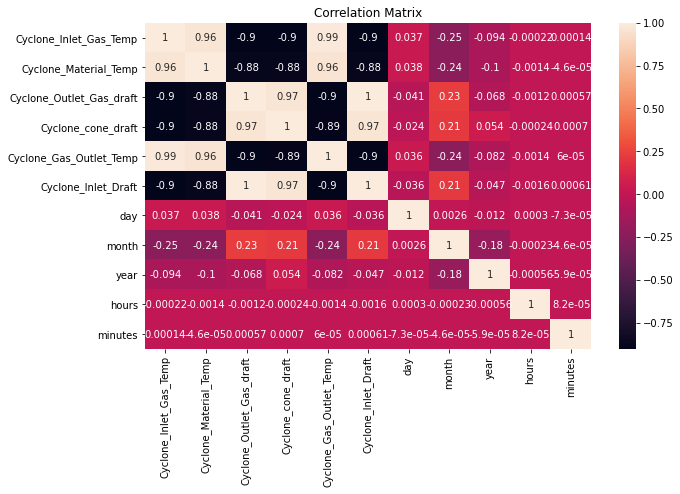

In [34]:
plt.figure(figsize=[10,6])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

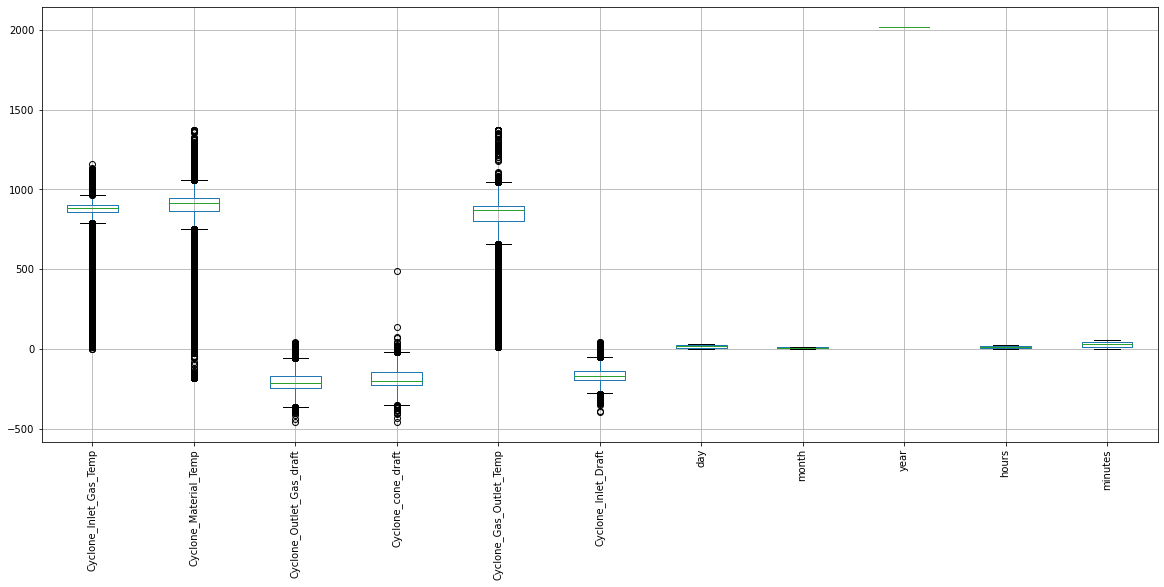

In [35]:
df_train.boxplot(figsize=[20,8])
#plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

In [36]:
df_train.drop(['time'],axis=1,inplace=True)

In [37]:
df_train.head()

Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  Cyclone_Outlet_Gas_draft  \
0                  867.63                 910.42                   -189.54   
1                  879.23                 918.14                   -184.33   
2                  875.67                 924.18                   -181.26   
3                  875.28                 923.15                   -179.15   
4                  891.66                 934.26                   -178.32   

   Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  Cyclone_Inlet_Draft  day  \
0             -186.04                   852.13              -145.90    1   
1             -182.10                   862.53              -149.76    1   
2             -166.47                   866.06              -145.01    1   
3             -174.83                   865.85              -142.82    1   
4             -173.72                   876.06              -143.39    1   

   month  year  hours  minutes  
0      1  2017      0        0  
1      1  2017      0        5  
2      1  2017      0       10  
3      1  2017      0       15  
4      1  2017      0       20

In [38]:
df_train.to_csv('cyclone_preheater_extraction records.csv') #Saving the corrected records

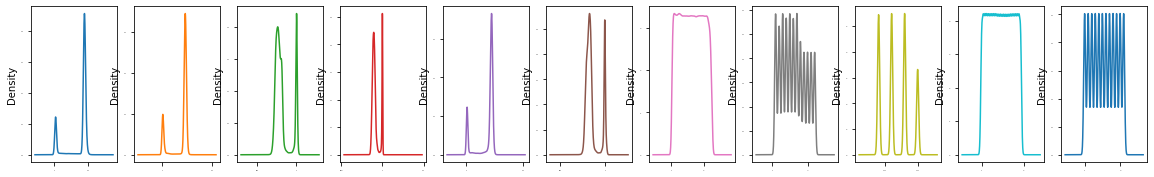

In [39]:
df_train.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False,fontsize=1,figsize=(20,20))
plt.show()

# Outlet Temperatures Vs Time:

<AxesSubplot:title={'center':'Analysis of Cyclone_Gas_Outlet_Temp VS year'}, xlabel='year', ylabel='Cyclone_Gas_Outlet_Temp'>

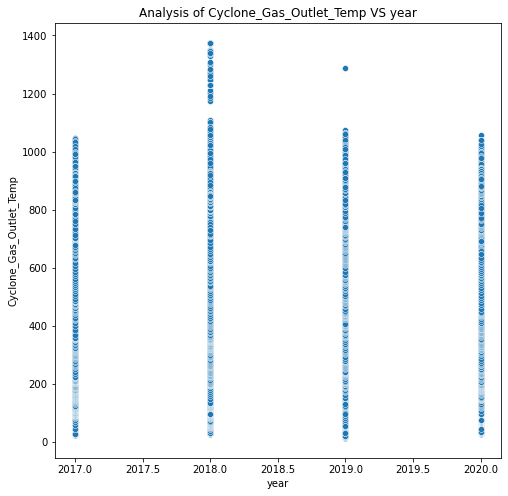

In [40]:
plt.figure(figsize=[8,8])
plt.title('Analysis of Cyclone_Gas_Outlet_Temp VS year')
sns.scatterplot(df_train['year'],df_train['Cyclone_Gas_Outlet_Temp'],palette='bright')

<AxesSubplot:title={'center':'Analysis of Cyclone_Gas_Outlet_Temp VS month'}, xlabel='month', ylabel='Cyclone_Gas_Outlet_Temp'>

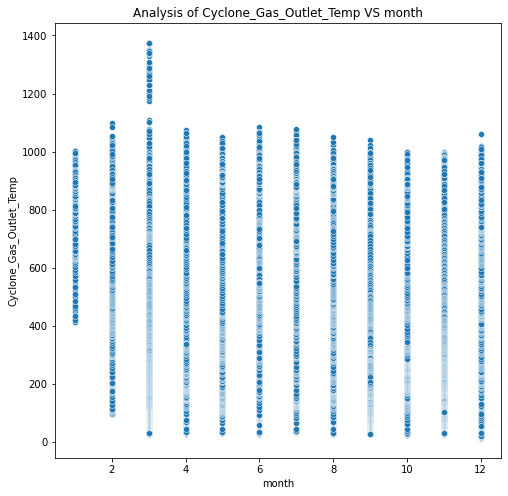

In [41]:
plt.figure(figsize=[8,8])
plt.title('Analysis of Cyclone_Gas_Outlet_Temp VS month')
sns.scatterplot(df_train['month'],df_train['Cyclone_Gas_Outlet_Temp'],palette='bright')

<AxesSubplot:title={'center':'Analysis of Cyclone_Gas_Outlet_Temp VS day'}, xlabel='day', ylabel='Cyclone_Gas_Outlet_Temp'>

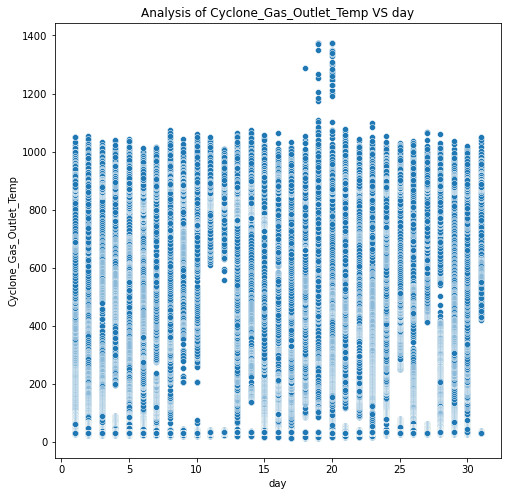

In [42]:
plt.figure(figsize=[8,8])
plt.title('Analysis of Cyclone_Gas_Outlet_Temp VS day')
sns.scatterplot(df_train['day'],df_train['Cyclone_Gas_Outlet_Temp'],palette='bright')

# UNIVARIATE ANALYSIS:

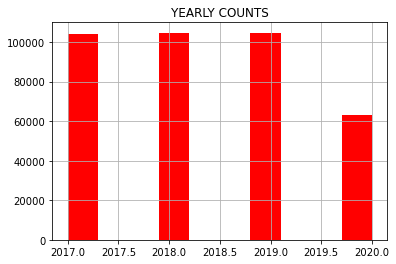

In [43]:
df_train["year"].hist(grid=True,color='red')
plt.title("YEARLY COUNTS")
plt.show()

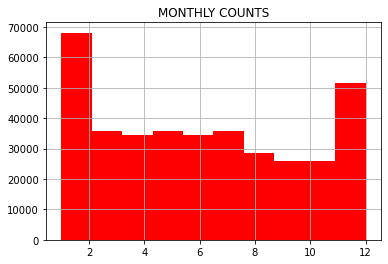

In [44]:
df_train["month"].hist(grid=True,color='red')
plt.title("MONTHLY COUNTS")
plt.show()

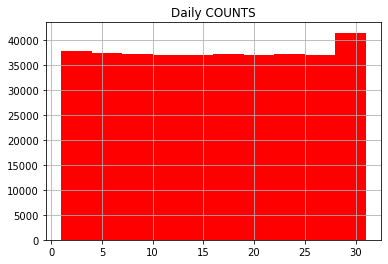

In [45]:
df_train["day"].hist(grid=True,color='red')
plt.title("Daily COUNTS")
plt.show()

Text(0.5, 1.0, 'Cyclone_Gas_Outlet_Temp')

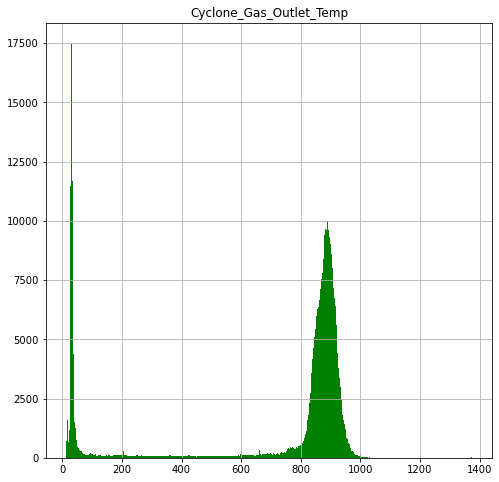

In [46]:
plt.subplots(figsize=(8,8))
df_train["Cyclone_Gas_Outlet_Temp"].hist(grid=True,color='green',bins=500)
plt.title("Cyclone_Gas_Outlet_Temp")

Text(0.5, 1.0, 'Cyclone_Material_Temp')

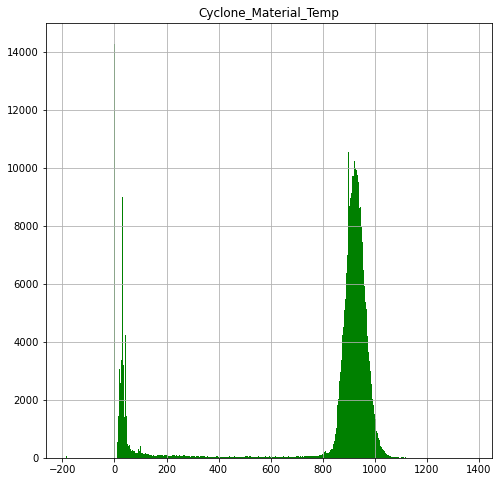

In [47]:
plt.subplots(figsize=(8,8))
df_train["Cyclone_Material_Temp"].hist(grid=True,color='green',bins=500)
plt.title("Cyclone_Material_Temp")

Text(0.5, 1.0, 'Cyclone_Inlet_Gas_Temp')

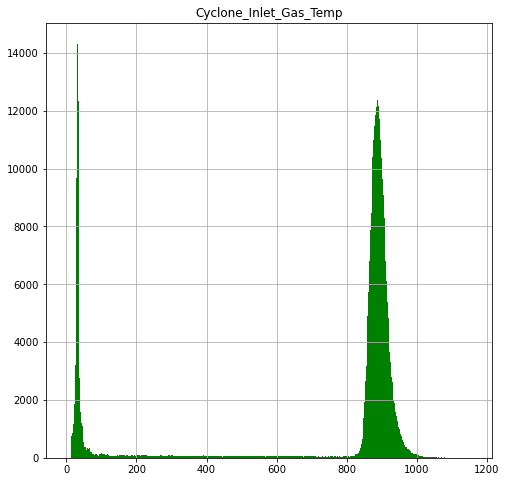

In [48]:
plt.subplots(figsize=(8,8))
df_train["Cyclone_Inlet_Gas_Temp"].hist(grid=True,color='green',bins=500)
plt.title("Cyclone_Inlet_Gas_Temp")

Text(0.5, 1.0, 'day')

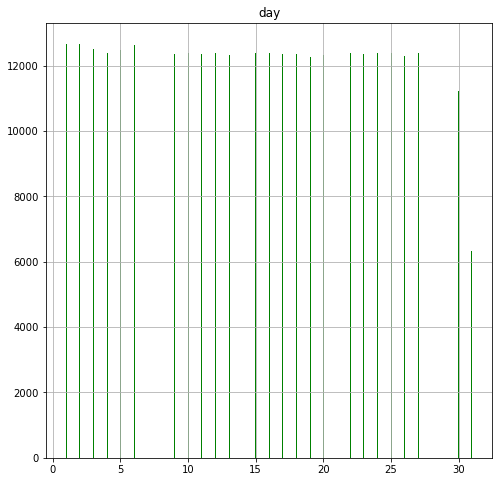

In [49]:
plt.subplots(figsize=(8,8))
df_train["day"].hist(grid=True,color='green',bins=500)
plt.title("day")

# BIVARIATE ANALYSIS:

<AxesSubplot:title={'center':'Cyclone_Material_Temp  with Cyclone_Inlet_Gas_Temp'}, xlabel='Cyclone_Material_Temp', ylabel='Cyclone_Inlet_Gas_Temp'>

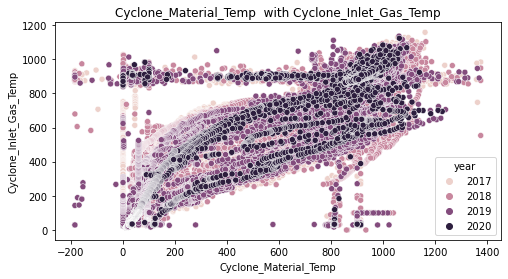

In [50]:
plt.figure(figsize=[8,4])
plt.title('Cyclone_Material_Temp  with Cyclone_Inlet_Gas_Temp')
sns.scatterplot(df_train['Cyclone_Material_Temp'],df_train['Cyclone_Inlet_Gas_Temp'],hue=df_train['year'])

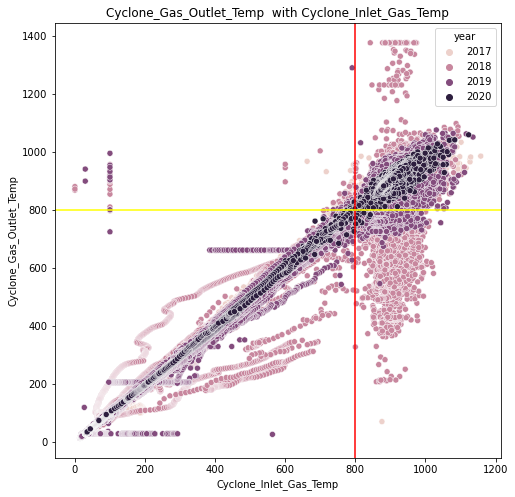

In [51]:
plt.figure(figsize=[8,8])
plt.title('Cyclone_Gas_Outlet_Temp  with Cyclone_Inlet_Gas_Temp')
sns.scatterplot(df_train['Cyclone_Inlet_Gas_Temp'],df_train['Cyclone_Gas_Outlet_Temp'],hue=df_train['year'])
plt.axvline(x=800, c="red", label="x=0")
plt.axhline(y=800, c="yellow", label="y=0")

<AxesSubplot:title={'center':'Cyclone_Outlet_Gas_draft with Cyclone_Inlet_Draft'}, xlabel='Cyclone_Outlet_Gas_draft', ylabel='Cyclone_Inlet_Draft'>

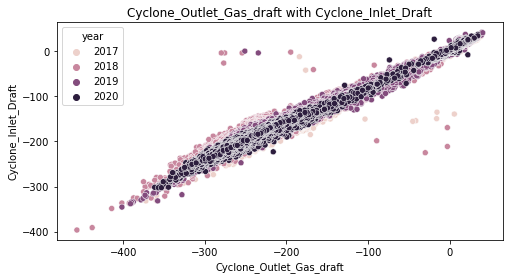

In [52]:
plt.figure(figsize=[8,4])
plt.title('Cyclone_Outlet_Gas_draft with Cyclone_Inlet_Draft')
sns.scatterplot(df_train['Cyclone_Outlet_Gas_draft'],df_train['Cyclone_Inlet_Draft'],hue=df_train['year'])

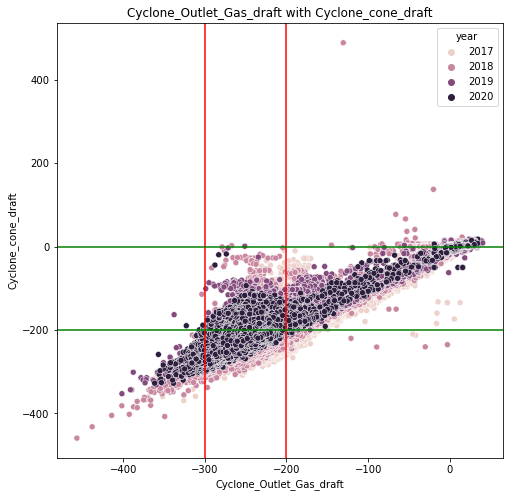

In [53]:
plt.figure(figsize=[8,8])
plt.title('Cyclone_Outlet_Gas_draft with Cyclone_cone_draft')
sns.scatterplot(df_train['Cyclone_Outlet_Gas_draft'],df_train['Cyclone_cone_draft'],hue=df_train['year'])
plt.axvline(x=-200, c="red")
plt.axvline(x=-300, c="red")
plt.axhline(y=-200, c="green")
plt.axhline(y=0, c="green")

<AxesSubplot:title={'center':'Cyclone_Inlet_Draft with Cyclone_cone_draft'}, xlabel='Cyclone_Inlet_Draft', ylabel='Cyclone_cone_draft'>

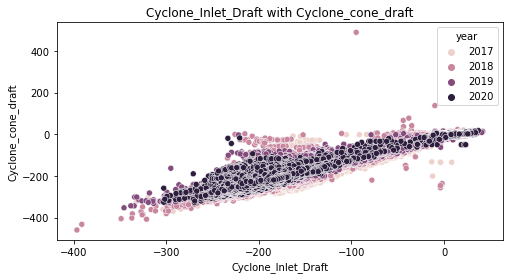

In [54]:
plt.figure(figsize=[8,4])
plt.title('Cyclone_Inlet_Draft with Cyclone_cone_draft')
sns.scatterplot(df_train['Cyclone_Inlet_Draft'],df_train['Cyclone_cone_draft'],hue=df_train['year'])

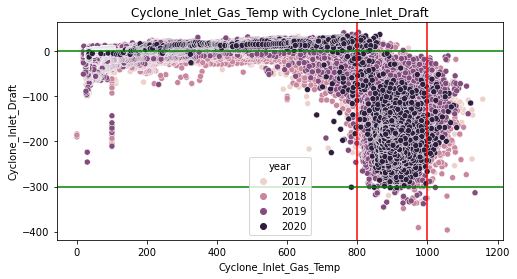

In [55]:
plt.figure(figsize=[8,4])
plt.title('Cyclone_Inlet_Gas_Temp with Cyclone_Inlet_Draft')
sns.scatterplot(df_train['Cyclone_Inlet_Gas_Temp'],df_train['Cyclone_Inlet_Draft'],hue=df_train['year'])
plt.axvline(x=800, c="red")
plt.axvline(x=1000, c="red")
plt.axhline(y=-300, c="green")
plt.axhline(y=0, c="green")

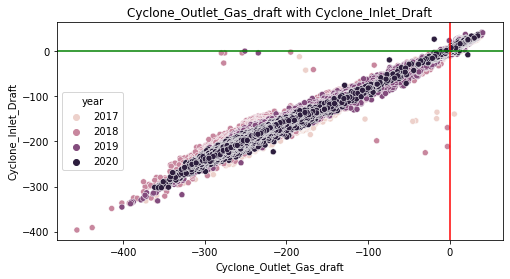

In [56]:
plt.figure(figsize=[8,4])
plt.title('Cyclone_Outlet_Gas_draft with Cyclone_Inlet_Draft')
sns.scatterplot(df_train['Cyclone_Outlet_Gas_draft'],df_train['Cyclone_Inlet_Draft'],hue=df_train['year'])
plt.axvline(x=0, c="red")
plt.axhline(y=0, c="green")

<AxesSubplot:title={'center':'Cyclone_Gas_Outlet_Temp with Cyclone_Outlet_Gas_draft'}, xlabel='Cyclone_Gas_Outlet_Temp', ylabel='Cyclone_Outlet_Gas_draft'>

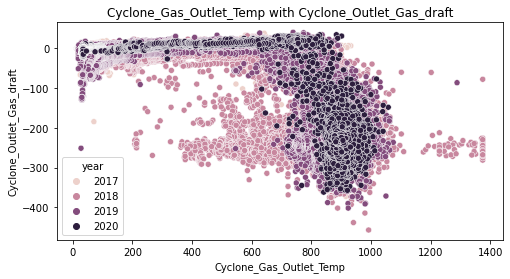

In [57]:
plt.figure(figsize=[8,4])
plt.title('Cyclone_Gas_Outlet_Temp with Cyclone_Outlet_Gas_draft')
sns.scatterplot(df_train['Cyclone_Gas_Outlet_Temp'],df_train['Cyclone_Outlet_Gas_draft'],hue=df_train['year'])

<AxesSubplot:title={'center':'Cyclone_Material_Temp  with Cyclone_Inlet_Gas_Temp'}, xlabel='Cyclone_Material_Temp', ylabel='Cyclone_Inlet_Gas_Temp'>

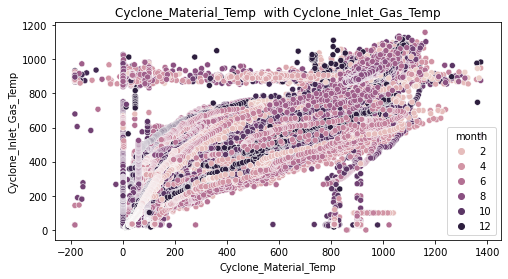

In [58]:
plt.figure(figsize=[8,4])
plt.title('Cyclone_Material_Temp  with Cyclone_Inlet_Gas_Temp')
sns.scatterplot(df_train['Cyclone_Material_Temp'],df_train['Cyclone_Inlet_Gas_Temp'],hue=df_train['month'])

<AxesSubplot:title={'center':'Cyclone_Gas_Outlet_Temp  with Cyclone_Inlet_Gas_Temp'}, xlabel='Cyclone_Inlet_Gas_Temp', ylabel='Cyclone_Gas_Outlet_Temp'>

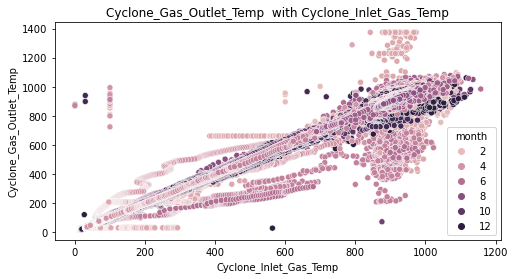

In [59]:
plt.figure(figsize=[8,4])
plt.title('Cyclone_Gas_Outlet_Temp  with Cyclone_Inlet_Gas_Temp')
sns.scatterplot(df_train['Cyclone_Inlet_Gas_Temp'],df_train['Cyclone_Gas_Outlet_Temp'],hue=df_train['month'])

<AxesSubplot:title={'center':'Cyclone_Gas_Outlet_Temp  with Cyclone_Inlet_Gas_Temp'}, xlabel='Cyclone_Inlet_Gas_Temp', ylabel='Cyclone_Gas_Outlet_Temp'>

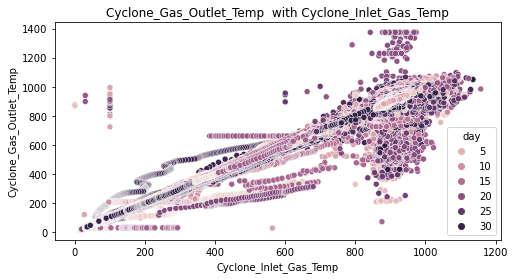

In [60]:
plt.figure(figsize=[8,4])
plt.title('Cyclone_Gas_Outlet_Temp  with Cyclone_Inlet_Gas_Temp')
sns.scatterplot(df_train['Cyclone_Inlet_Gas_Temp'],df_train['Cyclone_Gas_Outlet_Temp'],hue=df_train['day'])

<AxesSubplot:title={'center':'month  with Cyclone_Inlet_Gas_Temp'}, xlabel='month', ylabel='Cyclone_Inlet_Gas_Temp'>

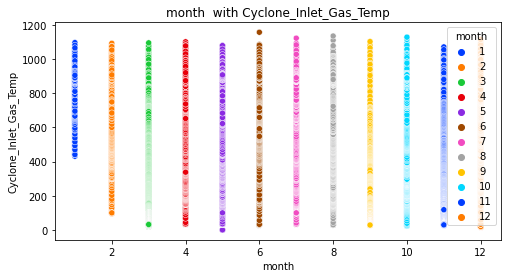

In [61]:
plt.figure(figsize=[8,4])
plt.title('month  with Cyclone_Inlet_Gas_Temp')
sns.scatterplot(df_train['month'],df_train['Cyclone_Inlet_Gas_Temp'],palette='bright',hue=df_train['month'])

<AxesSubplot:title={'center':'Analysis of month VS Cyclone_Gas_Outlet_Temp'}, xlabel='month', ylabel='Cyclone_Gas_Outlet_Temp'>

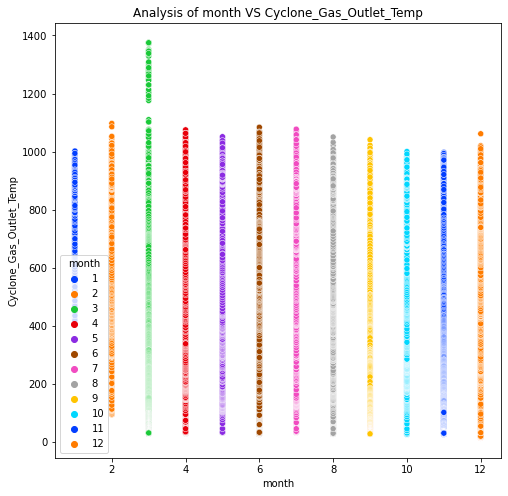

In [62]:
plt.figure(figsize=[8,8])
plt.title('Analysis of month VS Cyclone_Gas_Outlet_Temp')
sns.scatterplot(df_train['month'],df_train['Cyclone_Gas_Outlet_Temp'],palette='bright',hue=df_train['month'])

<AxesSubplot:title={'center':'Analysis of month VS Cyclone_Outlet_Gas_draft'}, xlabel='month', ylabel='Cyclone_Outlet_Gas_draft'>

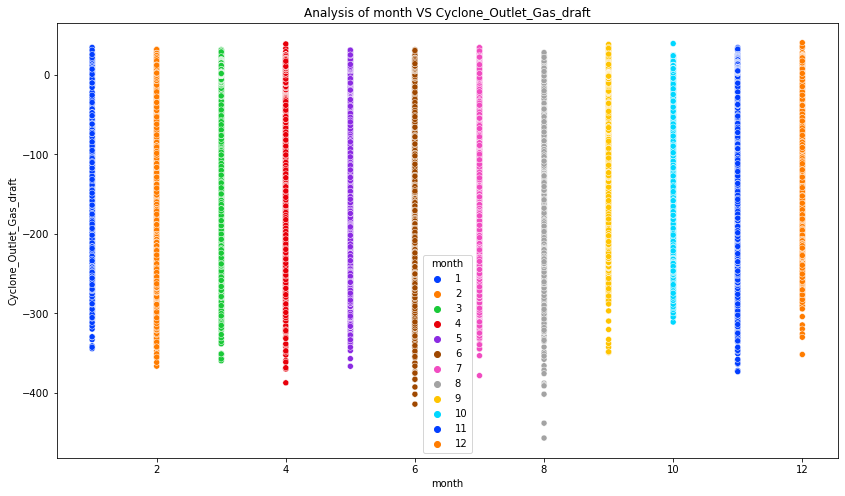

In [63]:
plt.figure(figsize=[14,8])
plt.title('Analysis of month VS Cyclone_Outlet_Gas_draft')
sns.scatterplot(df_train['month'],df_train['Cyclone_Outlet_Gas_draft'],palette='bright',hue=df_train['month'])

<AxesSubplot:title={'center':'Analysis of Cyclone_Material_Temp VS year'}, xlabel='year', ylabel='Cyclone_Material_Temp'>

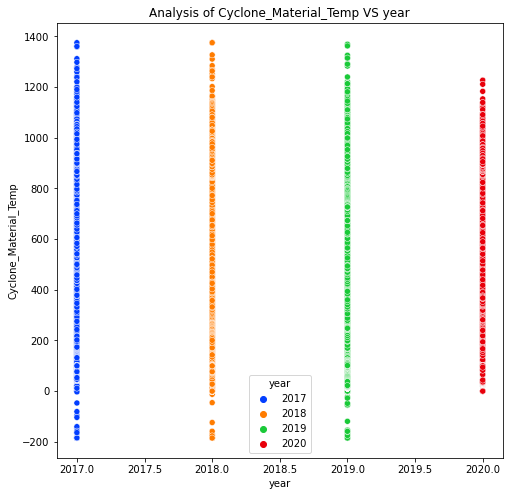

In [64]:
plt.figure(figsize=[8,8])
plt.title('Analysis of Cyclone_Material_Temp VS year')
sns.scatterplot(df_train['year'],df_train['Cyclone_Material_Temp'],palette='bright',hue=df_train['year'])

<AxesSubplot:title={'center':'Analysis of Cyclone_Outlet_Gas_draft VS year'}, xlabel='year', ylabel='Cyclone_Outlet_Gas_draft'>

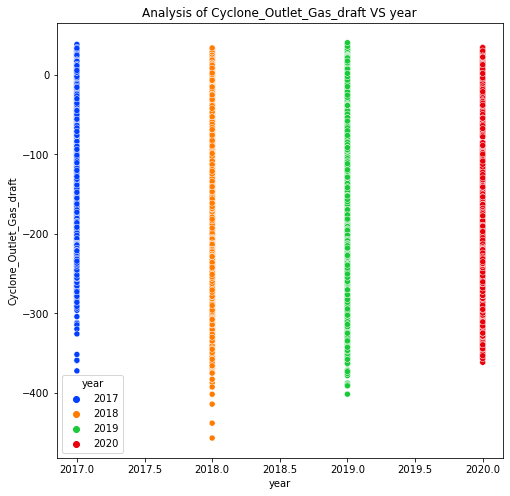

In [65]:
plt.figure(figsize=[8,8])
plt.title('Analysis of Cyclone_Outlet_Gas_draft VS year')
sns.scatterplot(df_train['year'],df_train['Cyclone_Outlet_Gas_draft'],palette='bright',hue=df_train['year'])

<AxesSubplot:title={'center':'Analysis of Cyclone_cone_draft VS year'}, xlabel='year', ylabel='Cyclone_cone_draft'>

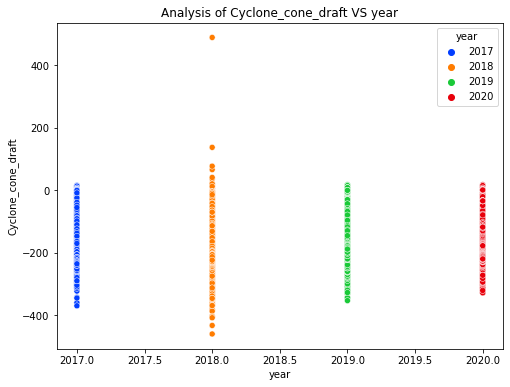

In [66]:
plt.figure(figsize=[8,6])
plt.title('Analysis of Cyclone_cone_draft VS year')
sns.scatterplot(df_train['year'],df_train['Cyclone_cone_draft'],palette='bright',hue=df_train['year'])

# Insights